<a href="https://colab.research.google.com/github/ams249/J68V47-Classwork/blob/master/DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas is a library used for stats and graphs

In [1]:
from pandas import read_csv, set_option

## Open data file

In [2]:
filename = "diabetes.csv"

## Array of names to represent spreadsheet columns

names = ['pregno', 'gluc', 'bp', 'skin', 'insu', 'bmi', 'pedg', 'age', 'result']

In [4]:
data = read_csv(filename)

## Print out info thats read in

In [5]:
data.shape

(767, 9)

In [6]:
data.dtypes

6          int64
148        int64
72         int64
35         int64
0          int64
33.6     float64
0.627    float64
50         int64
1          int64
dtype: object

In [7]:
data.head(15)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


## Print the stats for each column

In [8]:
set_option("display.width", 200)
set_option("display.max_columns", 10)
set_option("display.precision", 3) # 3dp
data.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000,767.000,767.000,767.000,767.000,767.000,767.000,767.000,767.000
mean,3.842,120.859,69.102,20.518,79.904,31.990,0.472,33.219,0.348
std,3.371,31.978,19.368,15.954,115.283,7.889,0.331,11.752,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.243,24.000,0.000
50%,3.000,117.000,72.000,23.000,32.000,32.000,0.371,29.000,0.000
75%,6.000,140.000,80.000,32.000,127.500,36.600,0.625,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


## Outcome 1 for diabetes and 0 for not

In [9]:
data.groupby('result').size()

KeyError: 'result'

## Histograms

In [10]:
from matplotlib import pyplot

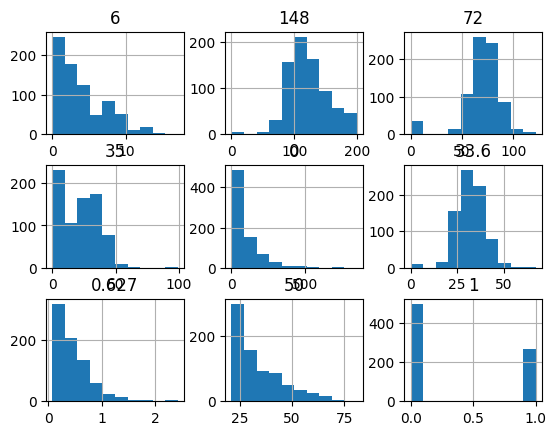

In [11]:
data.hist()
pyplot.show()

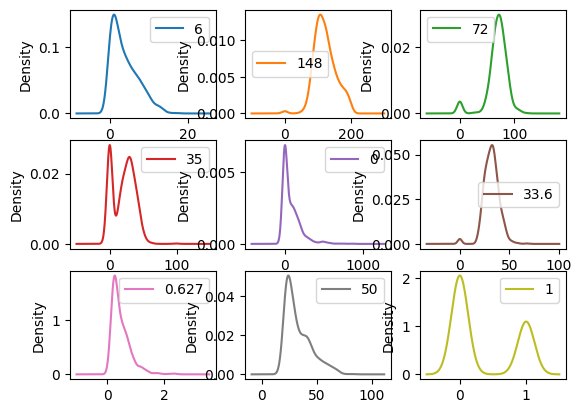

In [12]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

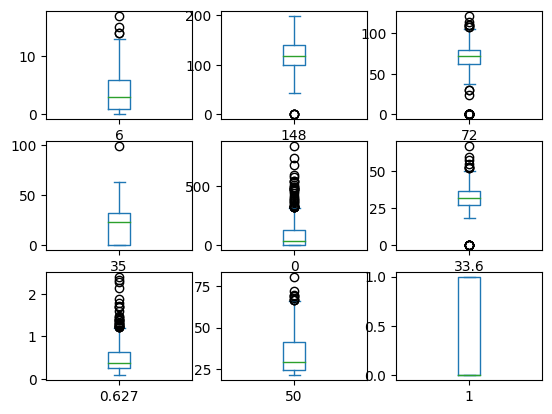

In [13]:
data.plot(kind='box', subplots=True, layout=(3,3), sharey=False)
pyplot.show()

## Output correlation

In [14]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,6,148,72,35,0,33.6,0.627,50,1
6,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
148,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
72,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
35,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
0,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
33.6,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
0.627,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
50,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
1,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


## Part 2

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump, load

## Set training data

In [16]:
array = data.values
X = array[:, 0:8]
Y = array[:, 8]

In [17]:
test_size = 0.3
seed = 17
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state = seed)

In [18]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [19]:
model.score(X_test, Y_test)

0.8051948051948052

## Save model

In [24]:
dump(model, open("prima_model.sav", "wb"))

In [21]:
from pickle import load

In [27]:
model = load(open("prima_model.sav", "wb"))

EOFError: Ran out of input

## Ask data for data to test

In [28]:
pregno = float(input("No of pregnancies: "))
gluc = float(input("Blood Glucose: "))
bp = float(input("Blood pressure: "))
skin = float(input("Skin fold in mn: "))
insu = float(input("Insulin mu U/ml: "))
bmi = float(input("BMI: "))
pedg = float(input("Pedigree function: "))
age = float(input("Age: "))

No of pregnancies: 7
Blood Glucose: 132
Blood pressure: 90
Skin fold in mn: 33
Insulin mu U/ml: 167
BMI: 38.1
Pedigree function: 1.288
Age: 37


## Set up new data and predict results

In [29]:
X_new = [[pregno, gluc, bp, skin, insu, bmi, pedg, age]]
Y_new = model.predict(X_new)

print("With data %s, Prediction is %s" % (X_new[0]), Y_new[0])

TypeError: not enough arguments for format string